__________________________________________________________________________________________________________________________________________________________________________________________________________________

# #import lib

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import json
import matplotlib.pyplot as plt
import cv2

__________________________________________________________________________________________________________________________________________________________________

In [2]:
# display the content of the specified JSON file labels name 
!cat '../input/pytorch-challange-flower-dataset/cat_to_name.json'
with open('../input/pytorch-challange-flower-dataset/cat_to_name.json') as f:
    cat_to_name = json.load(f)
type(cat_to_name)
cat_to_name['21']

{"21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster", "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy", "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly", "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist", "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower", "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation", "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone", "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow", "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid", "54": "s

'fire lily'

_____________________________________________________________________________________________________________________________________

# ###  training set and validation set data¶

Found 6552 files belonging to 102 classes.
images shape:  (32, 224, 224, 3)
labels shape:  (32,)


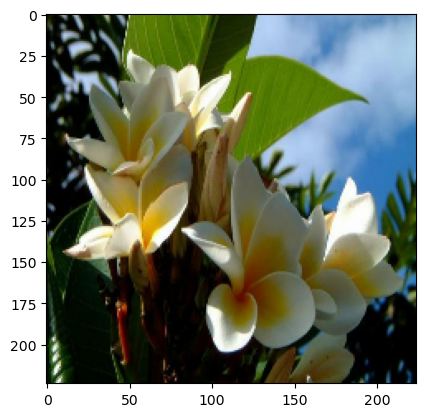

In [3]:
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  '../input/pytorch-challange-flower-dataset/dataset/train',
  validation_split=None,
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)
type(train_ds)
#Detect the type of component in each element
train_ds.element_spec
data_test =train_ds.as_numpy_iterator().next()
type(data_test)
print('images shape: ',data_test[0].shape)
print('labels shape: ',data_test[1].shape)
data_test[0].max()
plt.imshow(data_test[0][2].astype('uint8'))   


In [4]:
data_test[1][2]
cat_to_name[str(data_test[1][2])]
train_ds.class_names[:20]
train_ds.class_names[data_test[1][2]]
cat_to_name['81']    #鸡蛋花树
def flower_name(val):
    return cat_to_name[train_ds.class_names[val]]
flower_name(82)

'frangipani'

([], [])

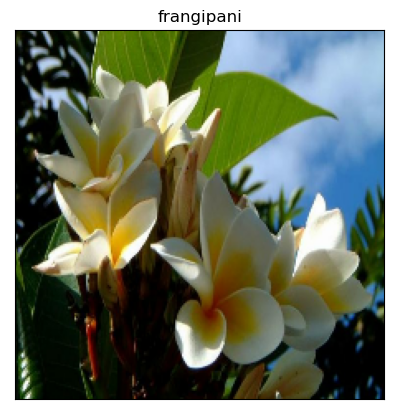

In [5]:
plt.imshow(data_test[0][2].astype('uint8'))  
plt.title(flower_name(data_test[1][2]))
plt.xticks([])
plt.yticks([])

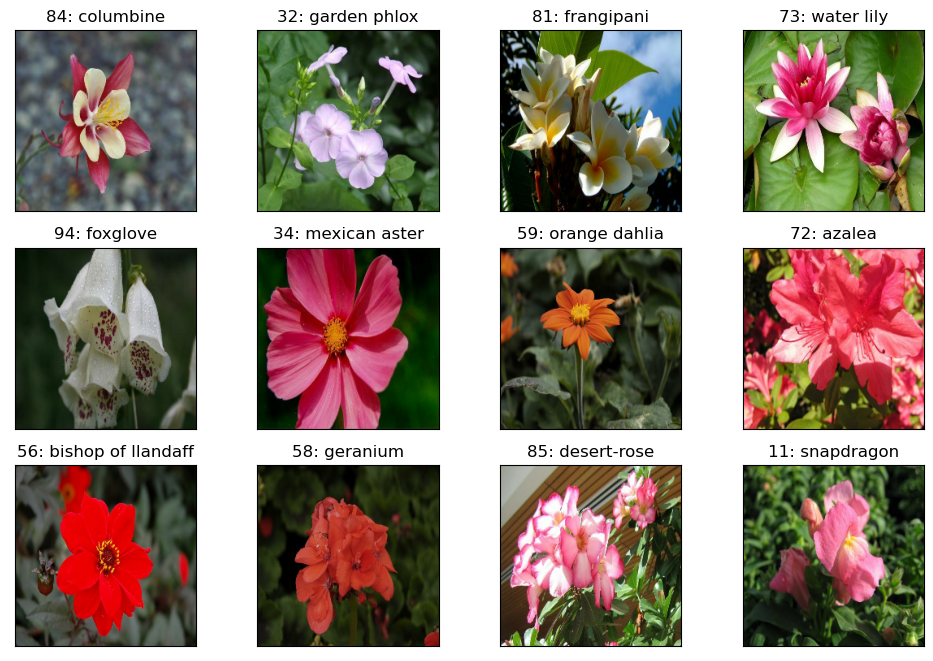

In [6]:
plt.figure(figsize=(12,8))
for idx in range(12):
    plt.subplot(3,4,idx+1)
    plt.imshow(data_test[0][idx].astype('uint8'))
    _tag_id = data_test[1][idx]
    _title = train_ds.class_names[_tag_id] + ': '+flower_name(_tag_id)
    plt.title(_title)
    plt.xticks([])
    plt.yticks([])

In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '../input/pytorch-challange-flower-dataset/dataset/valid',
  validation_split=None,
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

Found 818 files belonging to 102 classes.


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

###  ResNet50 Model

#### Modeling

In [13]:
resnet50_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = '/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
    input_shape = (img_height,img_width,3))
resnet50_model.trainable = False

In [14]:
model_50 = tf.keras.models.Sequential([
    resnet50_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(102)])

In [15]:
model_50.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 102)               52326     
                                                                 
Total params: 24,689,126
Trainable params: 1,101,414
Non-trainable params: 23,587,712
____________________________________

#### Compile model

In [16]:
model_50.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Training model

In [18]:
resnet50_epochs = 15
history_50 = model_50.fit(train_ds, validation_data=val_ds, epochs=resnet50_epochs)

Epoch 1/15
205/205 [==============================] - 697s 3s/step - loss: 3.4523 - accuracy: 0.2691 - val_loss: 2.0903 - val_accuracy: 0.5746
Epoch 2/15
205/205 [==============================] - 662s 3s/step - loss: 1.7232 - accuracy: 0.6090 - val_loss: 1.1591 - val_accuracy: 0.7616
Epoch 3/15
205/205 [==============================] - 661s 3s/step - loss: 1.0615 - accuracy: 0.7605 - val_loss: 0.8276 - val_accuracy: 0.8301
Epoch 4/15
205/205 [==============================] - 661s 3s/step - loss: 0.7652 - accuracy: 0.8234 - val_loss: 0.6680 - val_accuracy: 0.8545
Epoch 5/15
205/205 [==============================] - 671s 3s/step - loss: 0.5905 - accuracy: 0.8610 - val_loss: 0.5631 - val_accuracy: 0.8753
Epoch 6/15
205/205 [==============================] - 661s 3s/step - loss: 0.4690 - accuracy: 0.8941 - val_loss: 0.5092 - val_accuracy: 0.8875
Epoch 7/15
205/205 [==============================] - 658s 3s/step - loss: 0.3816 - accuracy: 0.9176 - val_loss: 0.4595 - val_accuracy: 0.8973

####  model performance

In [20]:
def show_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(loss))

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

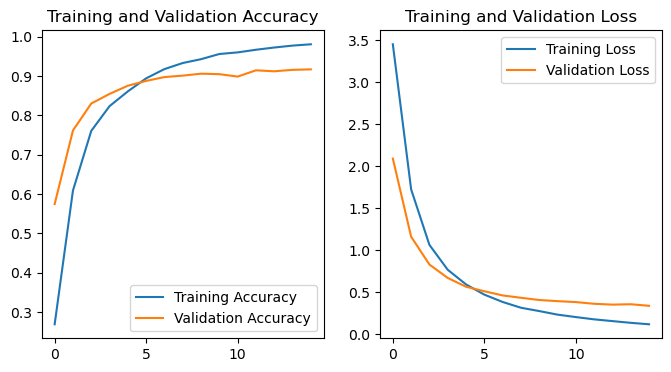

In [21]:
show_history(history_50)

## Saving Model



In [22]:
### SavedModel 
!mkdir -p saved_model
!ls ./
model_50.save('saved_model/50_model')
!ls saved_model/my_model
new_50_model = tf.keras.models.load_model('saved_model/50_model')
new_50_model.summary()

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model_50.save('50_model.h5')
!ls
# Recreate the exact same model, including its weights and the optimizer
new_50_model = tf.keras.models.load_model('50_model.h5')
new_50_model.summary()

saved_model
ls: cannot access 'saved_model/my_model': No such file or directory
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 102)               52326     
                                                                 
Total params: 24,689,126
Trainable params:

## Prediction flowers using a model

1/1 [==============================] - 0s 151ms/step
/kaggle/input/pytorch-challange-flower-dataset/dataset/train/11/image_03101.jpg most likely english marigoldhave 98.04% Confidence


(-0.5, 223.5, 223.5, -0.5)

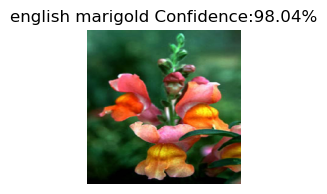

In [28]:
img_path = '/kaggle/input/pytorch-challange-flower-dataset/dataset/train/11/image_03101.jpg' 
img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
img
type(img)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array.shape
predictions = model_50.predict(img_array)             #未经softmax概率处理，相当于是个类别的分数
predictions
score = tf.nn.softmax(predictions[0])      #相当于是各类别的概率
score
print("{} most likely {}have {:.2f}% Confidence".format(img_path, cat_to_name[str(np.argmax(score))], 100 * np.max(score)))
plt.figure(figsize=(2, 2))
plt.imshow((img_array[0].numpy()).astype('uint8'))
plt.title("{} Confidence:{:.2f}%".format( cat_to_name[str(np.argmax(score))], 100 * np.max(score)))
plt.axis('off')